In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Đọc vào dataset

In [136]:
df = pd.read_csv('SmallDS.csv')


<h1 style="color:white;background-color:rgb(234, 93, 77);padding:10px; border-radius:10px; text-align:center"> Các thống kê cơ bản </h1>

In [137]:
df.head()

,id,name,brand,original_price,discount,current_price,discount_rate,quantity_sold,rating_average,product_review_count,seller_id,seller_name,days_since_joined,seller_rating_average,is_official,seller_review_count,total_follower
0,31638135,Combo 4 quần lót nam Boxer sợi cạp 1cm sợ...,MRM Manlywear,340000,85000,255000,25,4281,4.7,1167,55147,MRM Manlywear Official,1412,4.7070,True,11633,2943
1,172210350,"Hộp 4 quần boxer nam thun lạnh, quần lót nam c...",ARADO FASHION,199000,41000,158000,21,625,4.8,158,17914,FORMEN SHOP,1599,4.5441,False,4558,2041
2,79435123,"Áo chống nắng nam cao cấp, thông hơi, chống nắ...",OEM,215000,86000,129000,40,1010,4.7,263,17914,FORMEN SHOP,1599,4.5441,False,4558,2041
3,31637590,Combo 4 quần lót nam tam giác Bamboo Organi...,MRM Manlywear,340000,91000,249000,27,2765,4.7,761,55147,MRM Manlywear Official,1412,4.7070,True,11633,2943
4,99958075,Quần đùi short gió nam thể thao Basic trẻ...,MRM Manlywear,199000,70000,129000,35,2202,4.7,452,55147,MRM Manlywear Official,1412,4.7070,True,11633,2943


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   name                   1000 non-null   object 
 2   brand                  1000 non-null   object 
 3   original_price         1000 non-null   int64  
 4   discount               1000 non-null   int64  
 5   current_price          1000 non-null   int64  
 6   discount_rate          1000 non-null   int64  
 7   quantity_sold          1000 non-null   int64  
 8   rating_average         1000 non-null   float64
 9   product_review_count   1000 non-null   int64  
 10  seller_id              1000 non-null   int64  
 11  seller_name            1000 non-null   object 
 12  days_since_joined      1000 non-null   int64  
 13  seller_rating_average  1000 non-null   float64
 14  is_official            1000 non-null   bool   
 15  selle

Dùng original_price, price, discount, rating_average, quantity_sold -> predict price

In [139]:
df['brand'].value_counts()

brand
OEM              437
KHATOCO           62
GOKING            29
5S                26
MRM Manlywear     25
                ... 
Fezzio             1
Gumac              1
MAYHOMES           1
BAMI HOME          1
Redikick           1
Name: count, Length: 114, dtype: int64

### Kiểm tra có dữ liệu trống hay không ?

In [140]:
df.isnull().sum()

id                       0
name                     0
brand                    0
original_price           0
discount                 0
current_price            0
discount_rate            0
quantity_sold            0
rating_average           0
product_review_count     0
seller_id                0
seller_name              0
days_since_joined        0
seller_rating_average    0
is_official              0
seller_review_count      0
total_follower           0
dtype: int64

<p style="color:purple; font-weight:bold"> => API khi respond về có các mẫu bị trống dữ liệu nhưng đã được lược bỏ đi, không đưa vào dataset </p>

<h1 style="color:white;background-color:rgb(234, 93, 77);padding:10px; border-radius:10px; text-align:center"> Khám phá dữ liệu có gì ? </h1>

## So sánh giá ban đầu và giá đã giảm

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7888\4042076913.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.original_price, color='gray', shade=True, label='Original')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7888\4042076913.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.current_price, color='blue', shade=True, label='Current')


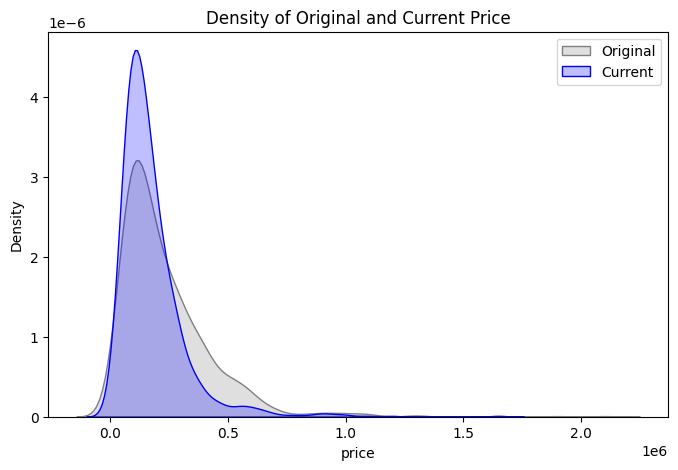

In [141]:
fig = plt.subplots(figsize=(8, 5))

ax = sns.kdeplot(df.original_price, color='gray', shade=True, label='Original')
ax = sns.kdeplot(df.current_price, color='blue', shade=True, label='Current')

plt.xlabel('price')
plt.title('Density of Original and Current Price')
plt.legend()
plt.show()

<p style="color:violet; font-weight:bold"> - Phần lớn giá đồ dùng thời trang thường dưới mức 1.000.000 VNĐ, các sản phẩm loanh quanh dưới 500.00 VNĐ rất nhiều (phần lớn là khoảng vài trăm) </p>

## Đánh giá càng tốt, càng bán chạy ?

> VẼ scatter plot

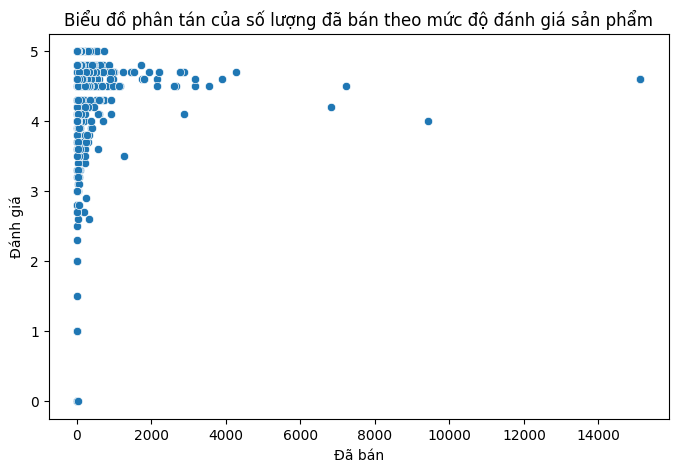

In [142]:
fig = plt.subplots(figsize=(8, 5))

ax=sns.scatterplot(data=df, x='quantity_sold', y='rating_average')

plt.xlabel('Đã bán')
plt.ylabel('Đánh giá')
plt.title('Biểu đồ phân tán của số lượng đã bán theo mức độ đánh giá sản phẩm')
plt.show()

<p style="color:red; font-weight:normal"> * Mặc dù có nhiều sản phẩm có mức độ đánh giá rất cao nhưng bán được cũng rất ít </p>
<p style="color:red; font-weight:normal"> * Các sản phẩm bán chạy có mức độ đánh giá khoảng từ 4.0 đến 5.0 </p> 
<p style="color:red; font-weight:bold">     => còn phụ thuộc vào số lượng đánh giá của sản phẩm nhận được và độ uy tín của người bán </p>

## Những sản phẩm bán chạy nhất

> Giao của rating_average, product_review_count, quantity_sold + Show ra table của các sản phẩm này (top 100)

In [143]:
def sort_product_by_col(col):
    res = df.groupby('id')[col].max().sort_values(ascending=False).index.tolist()
    return res

In [144]:
rating_average_lst = sort_product_by_col("rating_average")
product_review_count_lst = sort_product_by_col("product_review_count")
quantity_sold_lst = sort_product_by_col("quantity_sold")
print(rating_average_lst)

[251773296, 200927239, 86127619, 198320889, 198364769, 198518796, 198584661, 198650949, 198934502, 199679659, 151801252, 201119038, 198211399, 201292581, 201359185, 201853386, 174178053, 80973417, 201866940, 79396134, 152334968, 202020706, 176250783, 176301618, 67493148, 91861046, 147444853, 196370019, 147672967, 196856850, 93968595, 147937982, 92393846, 91935441, 196898067, 197170229, 87550402, 148337861, 197633193, 198099838, 198100134, 198112625, 89687135, 89631305, 198123072, 87967105, 77916015, 202038040, 77868132, 205968893, 73218325, 156000684, 204053479, 204914749, 205187503, 172919020, 172327845, 205297516, 205299392, 205993470, 77715371, 160417810, 160845877, 207269736, 160883985, 172282030, 67516826, 67516630, 67516618, 67516385, 204043794, 203952537, 155494342, 74493672, 77600983, 202383625, 202518134, 76596135, 153677777, 203115271, 76166657, 203197390, 154298071, 203490964, 75769500, 75767748, 154917738, 203821053, 203914610, 154921520, 203930800, 203951603, 74595348, 147

In [148]:
def top_k_common_elements(list1, list2, list3, k=10):
    list1, list2, list3 = list1[:k], list2[:k], list3[:k]
    return list(set(list1) | set(list2) | set(list3))
        
ids = top_k_common_elements(rating_average_lst, product_review_count_lst, quantity_sold_lst, 50)

result = pd.DataFrame()
for id in ids:
    result = pd.concat([result, df.loc[df['id'] == id]], ignore_index=True)
result

,id,name,brand,original_price,discount,current_price,discount_rate,quantity_sold,rating_average,product_review_count,seller_id,seller_name,days_since_joined,seller_rating_average,is_official,seller_review_count,total_follower
0,86127619,ÁO THUN BODY VẢI COTTON DÀY DẶN Y ẢNH (attron),OEM,116000,58000,58000,50,3,5.0,1,175928,xuongchuyensi9x,777,3.9713,False,348,75
1,174178053,"Áo Polo Nam Cổ Bẻ Guzado Chất Liệu Mát Mẻ, Pho...",GUZADO,175000,0,175000,0,6,5.0,3,141397,GUZADO,1012,4.4147,True,475,244
2,200927239,Áo PoLo form rộng phong cách Hàn Quốc thêu chữ...,OEM,79000,0,79000,0,2,5.0,1,309390,LyLa Shop,214,4.7500,False,4,3
3,103076103,"áo ba lỗ nam, áo 3 lỗ nam sợi cotton Orga...",JAMANO,99000,20000,79000,20,871,4.8,98,147336,JM STORE,976,4.6942,False,3898,910
4,110704393,Combo 2 quần đùi nam Cotton mặc nhà thoải...,JAMANO,140000,41000,99000,29,1161,4.5,234,147336,JM STORE,976,4.6942,False,3898,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,76537581,Quần Jean Nam Đen Trơn cao cấp thương hiệu Cha...,Chandi,280000,112000,168000,40,2140,4.5,706,18150,CHANDI OFFICIAL STORE,1593,4.5967,True,10013,1663
109,22760941,Combo 3 Áo thun nam cổ bẻ [ Tặng 1 quần lót xị...,dokafashion,406000,127500,278500,31,370,4.5,204,13906,Doka Fashion,1637,4.4620,True,1686,352
110,20261362,Bộ 5 Quần Lót Nam Nhật Thông Hơi Cao Cấp (Giao...,OEM,88000,0,88000,0,967,4.5,90,10911,5Star,1680,4.3544,False,4216,469
111,198320889,Áo polo nam A-CHILL TOUCH Anta 852237122,ANTA,1079000,323700,755300,30,2,5.0,2,6194,ANTA VIETNAM,1774,4.7441,True,4017,10447


## Top người bán uy tín

> Giao của seller_avg_rating, review_count (of seller), total_follower + Show ra table của các sản phẩm này (top 100)

In [146]:
print('Sản phẩm bán chạy nhất: ')
max_price = df['quantity_sold'].idxmax()
print(max_price)
max_row = df.loc[[max_price]]
max_row

Sản phẩm bán chạy nhất: 
28


,id,name,brand,original_price,discount,current_price,discount_rate,quantity_sold,rating_average,product_review_count,seller_id,seller_name,days_since_joined,seller_rating_average,is_official,seller_review_count,total_follower
28,67538621,COmbo 5 quần ĐÙI May 10,May 10,135000,15000,120000,11,15128,4.6,4681,16588,May 10,1607,4.574,False,7998,2295


In [147]:
print('Sản phẩm bán được ít nhất: ')
max_price = df['quantity_sold'].idxmin()
max_row = df.loc[[max_price], ['brand', 'original_price', 'price', 'discount', 'discount_rate', 'quantity_sold', 'rating_average', 'review_count', 'is_official']]
max_row

Sản phẩm bán được ít nhất: 


KeyError: "['price', 'review_count'] not in index"

<Axes: xlabel='rating_average', ylabel='count'>

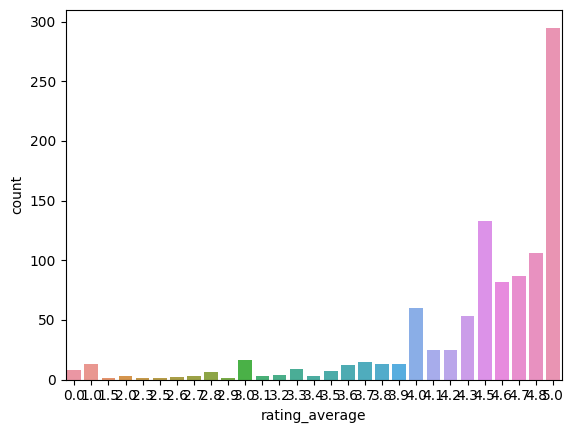

In [ ]:
sns.countplot(x = df['rating_average'])